In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Processing complete. Output files generated:
- Cleaned Text: /content/cleaned.txt
- NLTK Words: /content/nltk-words.txt
- TextBlob Words: /content/textblob-words.txt
- spaCy Words: /content/spacy-words.txt
- Top 10 Words (NLTK): /content/top10words-nltk.txt
- Top 10 Words (TextBlob): /content/top10words-textblob.txt
- Top 10 Words (spaCy): /content/top10words-spacy.txt
- Time Comparisons: /content/time_compares.txt


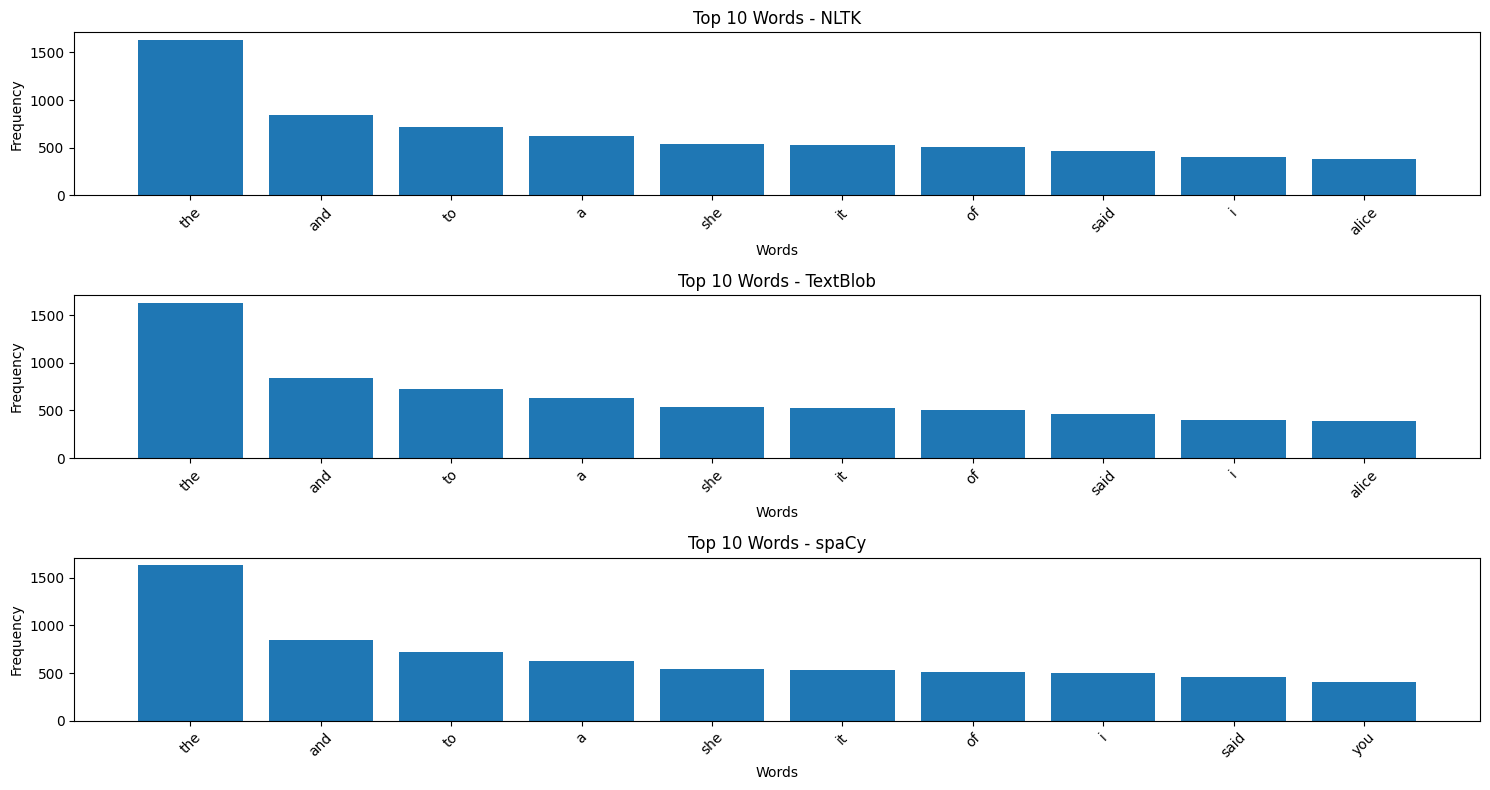

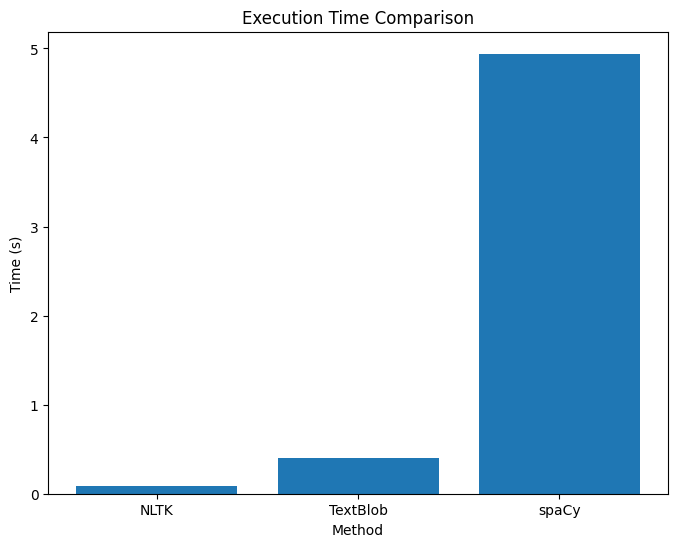

In [14]:
import requests
import time
from collections import Counter
import nltk
from textblob import TextBlob
import spacy
import re
import matplotlib.pyplot as plt
import pandas as pd

# Ensure spaCy model is downloaded
# Ensure nltk resources are downloaded
# nltk.download('punkt')

# Define file paths for Colab environment
INPUT_FILE = "/content/alice29.txt"
CLEANED_FILE = "/content/cleaned.txt"
NLTK_WORDS_FILE = "/content/nltk-words.txt"
TEXTBLOB_WORDS_FILE = "/content/textblob-words.txt"
SPACY_WORDS_FILE = "/content/spacy-words.txt"
TOP10_NLTK_FILE = "/content/top10words-nltk.txt"
TOP10_TEXTBLOB_FILE = "/content/top10words-textblob.txt"
TOP10_SPACY_FILE = "/content/top10words-spacy.txt"
TIME_COMPARES_FILE = "/content/time_compares.txt"

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabet characters
    text = re.sub(r'\s+', ' ', text)         # Remove extra spaces
    return text.strip().lower()

# Fetch text data
f = open(INPUT_FILE, "r")
raw_text = f.read()

# Clean the text
cleaned_text = clean_text(raw_text)
with open(CLEANED_FILE, "w") as f:
    f.write(cleaned_text)

# Framework comparison
times = {}

# NLTK Analysis
start = time.time()
nltk_words = nltk.word_tokenize(cleaned_text)
nltk_freq = Counter(nltk_words).most_common(10)
times['NLTK'] = time.time() - start
with open(NLTK_WORDS_FILE, "w") as f:
    f.write("\n".join(nltk_words))
with open(TOP10_NLTK_FILE, "w") as f:
    f.write("\n".join([f"{word}: {count}" for word, count in nltk_freq]))

# TextBlob Analysis
start = time.time()
blob = TextBlob(cleaned_text)
blob_words = blob.words
blob_freq = Counter(blob_words).most_common(10)
times['TextBlob'] = time.time() - start
with open(TEXTBLOB_WORDS_FILE, "w") as f:
    f.write("\n".join(blob_words))
with open(TOP10_TEXTBLOB_FILE, "w") as f:
    f.write("\n".join([f"{word}: {count}" for word, count in blob_freq]))

# spaCy Analysis
start = time.time()
nlp = spacy.load("en_core_web_sm")
doc = nlp(cleaned_text)
spacy_words = [token.text for token in doc if token.is_alpha]
spacy_freq = Counter(spacy_words).most_common(10)
times['spaCy'] = time.time() - start
with open(SPACY_WORDS_FILE, "w") as f:
    f.write("\n".join(spacy_words))
with open(TOP10_SPACY_FILE, "w") as f:
    f.write("\n".join([f"{word}: {count}" for word, count in spacy_freq]))

# Save time comparisons
with open(TIME_COMPARES_FILE, "w") as f:
    for framework, timing in times.items():
        f.write(f"{framework}: {timing:.4f} seconds\n")

print("Processing complete. Output files generated:")
print(f"- Cleaned Text: {CLEANED_FILE}")
print(f"- NLTK Words: {NLTK_WORDS_FILE}")
print(f"- TextBlob Words: {TEXTBLOB_WORDS_FILE}")
print(f"- spaCy Words: {SPACY_WORDS_FILE}")
print(f"- Top 10 Words (NLTK): {TOP10_NLTK_FILE}")
print(f"- Top 10 Words (TextBlob): {TOP10_TEXTBLOB_FILE}")
print(f"- Top 10 Words (spaCy): {TOP10_SPACY_FILE}")
print(f"- Time Comparisons: {TIME_COMPARES_FILE}")
# Plot Word Frequency for Each Method
methods = ["NLTK", "TextBlob", "spaCy"]
freq_data = [nltk_freq, blob_freq, spacy_freq]

plt.figure(figsize=(15, 8))
for i, (method, data) in enumerate(zip(methods, freq_data)):
    words, counts = zip(*data)
    plt.subplot(3, 1, i + 1)
    plt.bar(words, counts)
    plt.title(f"Top 10 Words - {method}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Execution Time Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(times.keys(), times.values())
plt.title("Execution Time Comparison")
plt.xlabel("Method")
plt.ylabel("Time (s)")
plt.show()

# Summary
It turns out that for the counting frequency of word using three different method outputs typing word quite similar. Both NLTK and TextBlob output the same results on top 10 words, but different from spaCy. Why?

The differences in tokenization between **NLTK**, **TextBlob**, and **spaCy** arise because each framework uses its own tokenization logic and algorithms, tailored to different NLP goals. Here's why they tokenize words differently:

---

### 1. **NLTK**
- **How it works**: 
  - Uses rule-based tokenization (`nltk.word_tokenize`) based on the Penn Treebank Tokenizer.
  - Splits text into words based on spaces and punctuation.
  - Handles contractions (`don't` -> `do`, `n't`) but may not be as advanced as other frameworks.

- **Strengths**:
  - Lightweight and fast for simple tokenization tasks.
  - Easy to customize using NLTK’s `RegexpTokenizer`.

- **Example Issues**:
  - May split words differently if the rules aren't comprehensive enough for edge cases (e.g., hyphenated words or uncommon punctuation).

---

### 2. **TextBlob**
- **How it works**:
  - Built on NLTK but simplifies and abstracts some processes.
  - Uses its own tokenization method based on the `nltk.tokenize` package.
  - Simplifies contractions and punctuation handling but doesn’t provide as fine-grained control as NLTK.

- **Strengths**:
  - Quick to implement for prototyping.
  - Decent tokenization for simple use cases.

- **Example Issues**:
  - Doesn't differentiate as effectively between proper nouns and other entities.
  - May miss complex tokenization rules for specific languages.

---

### 3. **spaCy**
- **How it works**:
  - Leverages advanced machine learning models trained on large datasets.
  - Uses language-specific tokenization rules.
  - Considers linguistic context, such as distinguishing between punctuation as part of a sentence (e.g., “U.S.”) and standalone punctuation.

- **Strengths**:
  - Handles contractions and punctuation more accurately (e.g., “don’t” stays intact unless explicitly split).
  - Handles edge cases like hyphenated words or mixed alphanumerics better.

- **Example Issues**:
  - Slightly slower compared to NLTK and TextBlob for very large corpora due to advanced processing.

---

### Common Tokenization Differences
Here are some specific examples of how tokenization might differ across the frameworks:

| **Text**               | **NLTK**                     | **TextBlob**           | **spaCy**               |
|-------------------------|------------------------------|-------------------------|--------------------------|
| "U.S.A is big."         | `['U.S.A', 'is', 'big', '.']`| `['U.S.A', 'is', 'big']`| `['U.S.A', 'is', 'big']`|
| "don't do that!"        | `['do', "n't", 'do', 'that', '!']` | `["don't", 'do', 'that']` | `["don't", 'do', 'that', '!']` |
| "hyphenated-word here." | `['hyphenated', '-', 'word', 'here', '.']`| `['hyphenated-word', 'here']` | `['hyphenated-word', 'here', '.']` |

---

### Why It Matters
- **Context Sensitivity**:
  - **spaCy** uses context and linguistic features, making it better for processing formal or complex text.
  - **NLTK** and **TextBlob** are rule-based and may split tokens where they shouldn’t or miss cases entirely.

- **Purpose of Use**:
  - If you need consistent, high-accuracy tokenization (especially for complex text), **spaCy** is the best choice.
  - If you're building lightweight, customizable solutions, **NLTK** might be more appropriate.
  - For simpler prototyping tasks, **TextBlob** offers ease of use.

---

### Conclusion
Different frameworks tokenize text differently because they are optimized for different use cases. If you notice inconsistent tokenization and need alignment, you could:
- Standardize the tokenization method by choosing one framework for all preprocessing.
- Use **spaCy** for its robust, context-aware tokenization if accuracy is critical.

Let me know if you need help aligning tokenization across the frameworks!